## Black Friday EDA dataset 

# Cleaning and preparing the data for model training

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
# importing the dataset
df=pd.read_csv("Black_friday.csv")

In [140]:
df.shape

(550068, 12)

In [141]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Problem Statement


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [142]:
# Preliminary Checks

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [143]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [144]:
df.drop(["User_ID"],axis=1,inplace=True)

In [145]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [147]:
# Categorical Features Encoding

df["Gender"] = df["Gender"].map({"F": 1, "M": 0})


In [148]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [149]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [150]:

df["Age"] = df["Age"].map({"0-17": 1, "18-25": 2, "26-35": 3 , "36-45": 4, "46-50": 5, "51-55":6, "55+":7 })


In [151]:
from sklearn import preprocessing

# Label encoder object understands how to encode word label
label_encoder=preprocessing.LabelEncoder()

# Encode labels from "Age"
df["Age"]=label_encoder.fit_transform(df["Age"])

df["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [152]:
df["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [153]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969


In [154]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [155]:
df["City_Category"]=df["City_Category"].map({"A": 1, "B": 2, "C": 3 })

In [156]:
from sklearn import preprocessing

# Label encoder object understands how to encode word label
label_encoder=preprocessing.LabelEncoder()

# Encode labels from "Age"
df["City_Category"]=label_encoder.fit_transform(df["City_Category"])

df["City_Category"].unique()

array([0, 2, 1], dtype=int64)

In [157]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,1,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,1,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,1,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,0,6,16,2,4+,0,8,NaN,NaN,7969


In [158]:
# Handling Missing Values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [159]:
# Replacing Missing Values

df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [160]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [161]:
# Given the values assigned to the variables are discrete we will be replacing the null values with mode

df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [162]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [163]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [164]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [166]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,1,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,1,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,1,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,0,6,16,2,4+,0,8,8.0,16.0,7969


In [167]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [174]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")

In [175]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [177]:
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,0,2,0,3,8.0,16.0,8370
1,P00248942,1,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,1,0,10,0,2,0,12,8.0,16.0,1422
3,P00085442,1,0,10,0,2,0,12,14.0,16.0,1057
4,P00285442,0,6,16,2,4,0,8,8.0,16.0,7969


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [179]:
# Converting objects into integers

df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 44.1+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

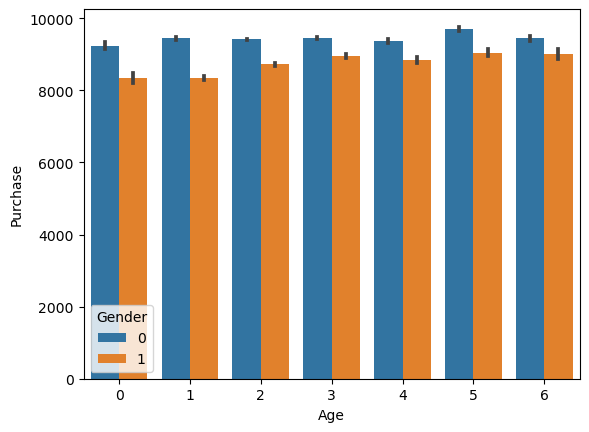

In [183]:
# Visualization

sns.barplot(x="Age",y="Purchase",hue="Gender",data=df)

# Inferences

It has been observed from the barplot illustration of a particular segment of data that men which a=are represented by O  i,e the blue bar plot 
tend to buy more than women represented by 1.

<Axes: xlabel='Occupation', ylabel='Purchase'>

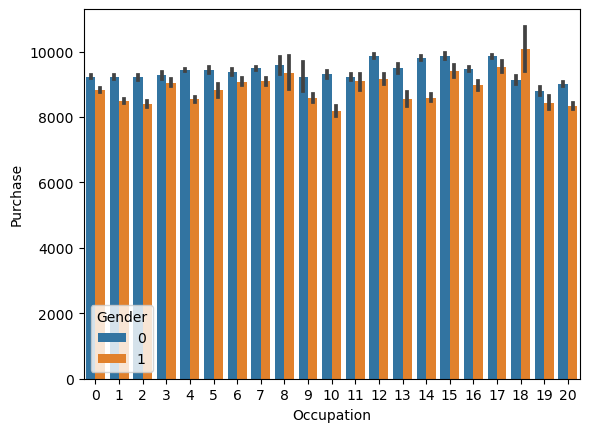

In [184]:
sns.barplot(x="Occupation",y="Purchase",hue="Gender",data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

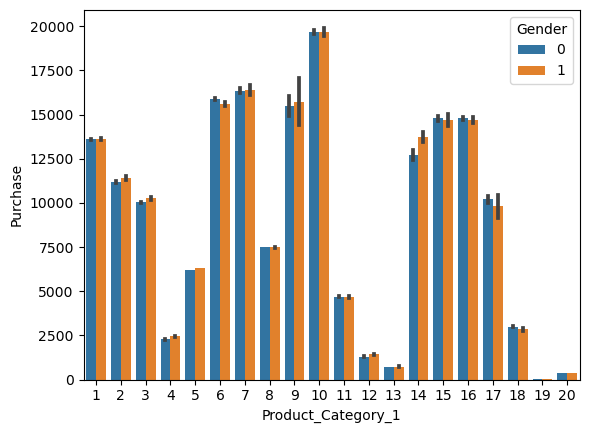

In [185]:
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

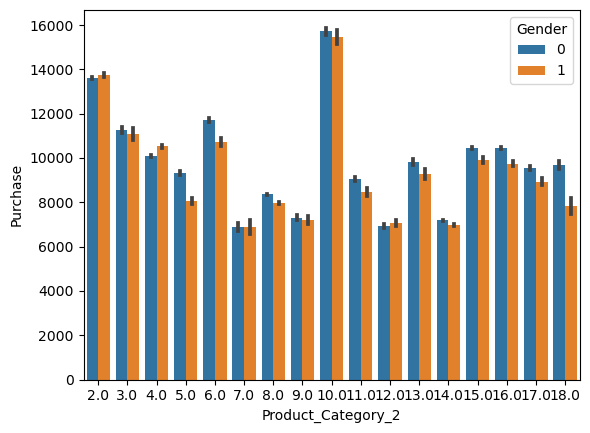

In [186]:
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=df)